In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
iris_df = pd.read_csv("Iris.csv")

if "Id" in iris_df.columns:
    iris_df = iris_df.drop(columns=["Id"])

print("First 5 rows of the dataset:")
iris_df.head()


First 5 rows of the dataset:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = iris_df.drop(columns=["Species"])
y = iris_df["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [6]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k} with Accuracy: {max(accuracies):.4f}")


Best K: 2 with Accuracy: 1.0000


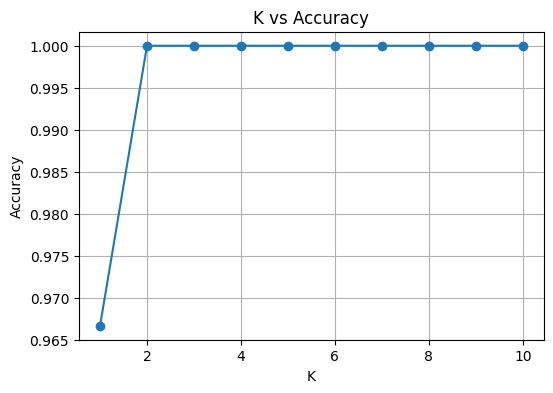

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker="o")
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


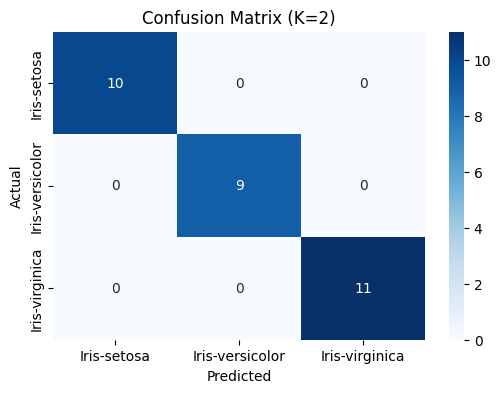

In [8]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn_best.classes_,
            yticklabels=knn_best.classes_)
plt.title(f"Confusion Matrix (K={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


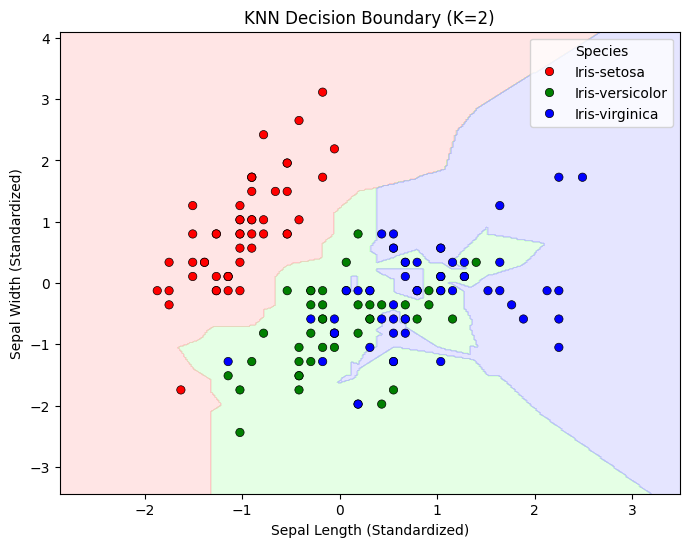

In [9]:
from matplotlib.colors import ListedColormap

X_plot = X_scaled[:, :2]
y_plot = y

X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(
    X_plot, y_plot, test_size=0.2, random_state=42
)
knn_plot = KNeighborsClassifier(n_neighbors=best_k)
knn_plot.fit(X_train_plot, y_train_plot)

# meshgrid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# grid prediction
Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([list(knn_plot.classes_).index(label) for label in Z])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_points = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=y_plot,
                palette=["red", "green", "blue"], edgecolor='k')
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.show()
